# Dimensionality reduction analysis

After applying the different clustering algorithms, we now look at ways to improve the obtained results. One way to do so is by applying dimension reduction techniques such as Principal Component Analysis (PCA) and Canonical Correlation Analysis (CCA).


**<font color='red'>PCA:</font>** This method is used to reduced the dimensions of the data. In fact, sometimes we have variables that do not give any information about the data and thus removing these variables can lead to better results.  

**<font color='red'>CCA:</font>** This method is used to detect correlations between different subgroups of data. In fact, sometimes we have variables that are so strongly correlated that reducing the dimensions using linear combinations between the correlated variables can imporove the results
It is **important to note that we will NOT use the labels when applying PCA and CCA.**

___


Therefore, in this part of the project, you will apply both PCA and CCA on the data you chose in the clustering part. Afterwards, you will apply the clustering method that gave the best results in TD2_3 on the reduced dataset you obtained from the PCA step.

**You should send this notebook filled with your results before 11.59pm on Sunday 8 December.**

You must submit it using eCampus, or send a mail to either massinissa.hamidi@univ-evry.fr or clement.bernard@univ-evry.fr.

## Mount Drive

**For google colab users only**

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

# Change to the directory to where your files are
os.chdir('drive/My Drive/')



## Import Libraries

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


## Load the dataset, separate data from classes



Load the dataset you are using in your project and separate the data from the class.

**<font color='red'>N.B:</font>** If you have applied some preprocessing steps (missing value replacement, factorize), please used the dataset you obtained after all the steps (you should have saved your dataset in notebook TD2_3.ipynb) without the normalization step.





In [2]:
df = pd.read_csv('data/cleaned_pumpkin_seeds_unscaled.csv')


In [3]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [4]:
X = df.drop(columns=['Class']) 

In [5]:
y = df['Class']  

In [8]:
X.shape, y.shape

((2500, 12), (2500,))

## Part 1: Apply PCA


##### We start by scaling the data so that each feature has a single unit variance.  


**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale both continuous and numerical variables.
PCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[-1.78470346, -2.21575484, -2.32022415, ...,  1.8737626 ,
        -1.77506344,  2.19727996],
       [-0.29478016, -0.56880361, -0.70091635, ...,  0.93837685,
        -0.82486401,  0.84023019],
       [-0.66135033, -0.43294002, -0.36939513, ..., -0.43161453,
         0.07405883, -0.21148339],
       ...,
       [ 0.53695644,  0.7326892 ,  0.90028724, ..., -0.65517709,
         0.76312751, -0.83346454],
       [-0.04737457,  0.48215494,  0.8057821 , ..., -1.30619127,
         1.29646729, -1.28581446],
       [ 0.31297387,  0.27147071,  0.11193101, ...,  0.0316071 ,
        -0.21587543,  0.1183551 ]], shape=(2500, 12))


##### We then instantiate a PCA object.

The main parameter of this method is the max number of components. In this project, we will choose it to be equal to the max number of variables in the data.


In [13]:
pca = PCA(n_components=X.shape[1]) 

X_pca = pca.fit_transform(X_scaled)

### Interpreting the components

The next step is to choose the number of components to keep.

##### Plot the explained variance of each component using the corrected variance.

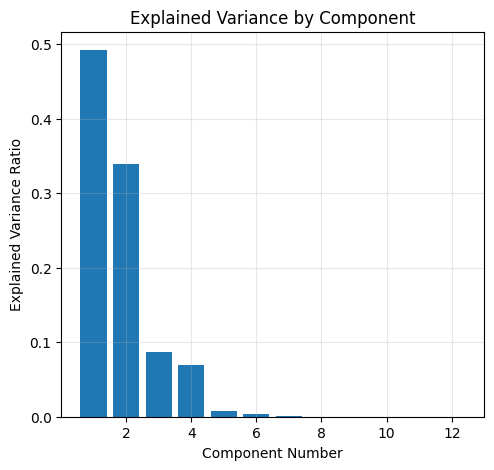

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True, alpha=0.3)

##### Plot the cumulative variance of the components based on the explained variance ratio.

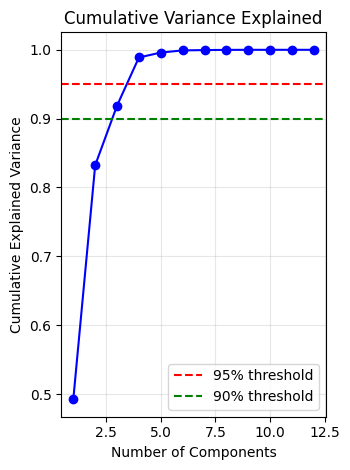

In [16]:
plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
print(f"\nExplained variance ratio by component:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    cum_var = cumulative_variance[i-1]
    print(f"  PC{i}: {var:.4f} (cumulative: {cum_var:.4f})")

# Choose number of components 
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1


print(f"Components needed for 90% variance: {n_components_90}")
print(f"Components needed for 95% variance: {n_components_95}")



Explained variance ratio by component:
  PC1: 0.4924 (cumulative: 0.4924)
  PC2: 0.3399 (cumulative: 0.8323)
  PC3: 0.0867 (cumulative: 0.9189)
  PC4: 0.0699 (cumulative: 0.9888)
  PC5: 0.0071 (cumulative: 0.9960)
  PC6: 0.0031 (cumulative: 0.9991)
  PC7: 0.0005 (cumulative: 0.9996)
  PC8: 0.0003 (cumulative: 0.9999)
  PC9: 0.0001 (cumulative: 1.0000)
  PC10: 0.0000 (cumulative: 1.0000)
  PC11: 0.0000 (cumulative: 1.0000)
  PC12: 0.0000 (cumulative: 1.0000)
Components needed for 90% variance: 3
Components needed for 95% variance: 4


##### How many components will you keep? Explain your choice.

### Choice of Number of PCA Components

The explained variance ratios indicate how much information each principal component captures.  
The first two components (PC1 and PC2) already explain **83.23%** of the total variance:

- **PC1:** 49.24%  
- **PC2:** 33.99%  
  → **Cumulative: 83.23%**

Adding the third component increases the cumulative explained variance to **91.89%**, meaning that the first **three** components together retain more than **90% of the total information** of the dataset.

After PC3, the contribution of additional components becomes very small:

- **PC4:** +6.99% (cumulative 98.88%)  
- **PC5–PC12:** each contributes less than 1%, most nearly zero  

This shows that the relevant structure of the data is concentrated in the first few principal components, while the remaining ones represent mostly noise or redundant information.

### **Conclusion**
We choose to keep **3 principal components**, as this:
- Reduces dimensionality from 12 to 3  
- Preserves over **90%** of the variance  
- Discards components containing almost no useful information  

Thus, **3 components** provide an optimal trade-off between dimensionality reduction and information preservation.


**Note:** If you do choose to keep all components in your analysis, you do not perform any dimension reduction.

##### Create your reduced dimensionality dataset by only keeping the components you chose to keep in the above question.

In [ ]:
k = 3                       
X_pca = pca.transform(X_scaled)[:, :k]  

NameError: name 'X_pca_full' is not defined

##### What is the inertia percentage explained by the components you kept *(le pourcentage d’inertie expliquée par le premier axe factoriel)*?

What does it mean?

 # first component explains ~49.24% of the variance — this means the first axis accounts for almost half the total variance in the standardized data.


##### Calculate the contribution of the first individual to the first component *(la contribution du premier individu au premier axe factoriel)*.

##### Calculate the quality of representation of this individual in the map made of the first factorial axis *(la qualité de représentation de cet individu dans le plan constitué du premier axe factoriel)*.

What can you deduce?

### Variable representation

#### Compute the correlation between the principal components and the variables

##### Print the correlation matrix.

##### Plot the correlation circle

##### Interpret the obtained results

## Applying clustering on the newly created dataset.

Recall in TD2_3.ipynb, you applied different clustering algorithms on your dataset and analyzed which method gave the best results on your dataset.

##### Apply this clustering method to the dataset you obtained after applying PCA and performing dimension reduction.

##### Using the same metrics you used in TD2_3.ipynb, compare the results obtained with this method to the real classes.

##### In your opinion, did dimensionality reduction help you in getting better results or not?

## Part 2: Apply CCA

Next steps:
   - Apply CCA /!\ Don't forget to split the dataset into two groups,i.e., p=3 and q=3
   - Analyze the correlation circle *(graphe des variables)*
   - Analyze the observation graph *(graphe des individus)*

**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale use continuous and numerical variables.
CCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

### Choice of the two groups

##### Show the correlation matrix of the data

##### Split your data into two groups p and q

##### How did you choose your two groups?

### Apply CCA

CCA with scikit-learn uses a very similar process to other preprocessing functions that come with scikit-learn. We instantiate a CCA object, find the  components (linear combinations of the variables) using the fit method, then apply the dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the CCA object.

Check the scikit-learn documentation for CCA. Do you need to use the scaled or unscaled data to apply CCA?



##### Apply CCA

##### Print the first two components

##### Print the correlation matrix between the first two components

##### What can you conclude?

### Results visualization and interpretation

#### Variable representation

##### Compute the correlation between the components and the variables

[*aide: utiliser les matrices centrées-réduites*]

##### Show the correlation circle

##### Interpret the obtained results

#### Individual visualization

##### Show the individuals representation

##### Interpret the obtained results

### CCA Conclusion
Based on your visualizations, do you think it would be useful to use the CCA results to reduce the dimensionality of your dataset before applying some form of clustering method, like you did with PCA? Why / why not?